# Problem 94

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = np.loadtxt("seqs.txt",dtype=str)

In [13]:
df = pd.DataFrame(data)

In [33]:
seq = df[df[0]=="crp-wt"]
b0 = seq[seq[1]=="B0"]
b1 = seq[seq[1]=="B1"]

## We want the probability of each base at a given position

In [132]:
sum(b1[2].str[0]=="A")

def base_freq(b1,i):
    tot = sum(b1[2].str[i]!=0)
    a_f = sum(b1[2].str[i]=="A")
    t_f = sum(b1[2].str[i]=="T")
    c_f = sum(b1[2].str[i]=="C")
    g_f = sum(b1[2].str[i]=="G")
    #return [a_f,t_f,c_f,g_f,tot]    
    return [a_f/tot,t_f/tot,c_f/tot,g_f/tot,tot]

In [133]:
#compute frequencies for all b1 sites
b_freqs = []
for n in range(1,10):
    bs = seq[seq[1]=="B"+str(n)]
    b_f = []
    for x in range(len(bs[2].iloc[0])):
        b_f.append(base_freq(bs,x))
    b_freqs.append(b_f)

In [134]:
b_freqs = np.array(b_freqs)

In [135]:
b_freqs[1,10,1] #batch num, site along sequence, number of counts (0:3, 4 is total)

0.11829552681789272

## Computing Information

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[0.016302127733059515, 7.590281099399167, 6.099633245180515, 6.190969541565895, 7.3388059907451435, 7.556008254102536, 5.810940184592536, 6.5084102186974375, 5.71055917082566, 6.442297583444777, 7.016408764077063, 7.521911007431436, 6.433282773936184, 6.321025870823342, 7.525985614008541, 7.135266693782275, 8.141486540164319, 5.751589819722397, 6.773667046880634, 7.022630305413414, 7.228000144055461, 6.582070836380772, 7.876926666163792, 7.652789365714276, 6.057930195753084, 6.390623861411185, 7.776098679850255, 0.15564596659709531, 0.2153657809091889, 0.3969310547762615, 0.2343682977783499, 0.2777224412660242, 0.18184112898731603, 0.15806935937904407, 0.3177457972665185, 0.273093964452925, 0.14675105809244168, 0.232058900791372, 0.3887928793221985, 0.14843063588247776, 0.03182333883329743, 0.11228178808562853, 0.23981181189691977, 0.3862451544166451, 0.20391489925202982, 0.3505871419085732, 0.1313035756873729, 0.05196158345553093, 0.09192106484242771, 0.18748409109822173, 0.1563267738

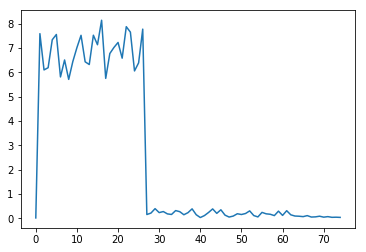

In [151]:
I = []
for k in range(len(b_freqs[0,:,0])):
    
    I.append( -1* sum(sum(  b_freqs[:,k,:-1] * np.nan_to_num(np.log(b_freqs[:,k,:-1]) ))  )  )
    
plt.plot( range(len(I)), I)
print(I)

## Clearly, only sites 1 through ~25 carry much information, and the rest are very similar.  The Information doesn't appear to ever be exactly zero, but it can get very low at the begining and very end.